In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

import cv2
from rembg import remove

from skimage.exposure import match_histograms

In [2]:
# Set the path to the destination directory
dest_dir = '../data/background_removed_histogram_matching'

# Initialize a counter for directories with exactly one image
single_image_dirs_count = 0

# List all subdirectories in the destination directory
for subdir in os.listdir(dest_dir):
    subdir_path = os.path.join(dest_dir, subdir)
    if os.path.isdir(subdir_path):  # Ensure it's a directory
        # Get a list of files in the subdirectory
        files = [file for file in os.listdir(subdir_path) if file.lower().endswith('.jpg')]
        # Check if there is exactly one image file
        if len(files) == 1:
            single_image_dirs_count += 1
            print(f"Directory {subdir} has exactly one image.")

# Print the count of directories with exactly one image
print(f"There are {single_image_dirs_count} directories with exactly one image.")


Directory CUL48_Right has exactly one image.
Directory CUL170_right has exactly one image.
Directory CUL153_left has exactly one image.
Directory MML120_Left has exactly one image.
Directory CUL209_right has exactly one image.
Directory DHL07_Left has exactly one image.
Directory CUL145_Left has exactly one image.
Directory BHA53_Right has exactly one image.
Directory CUL75_Right has exactly one image.
Directory BRL36_Right has exactly one image.
Directory CUL30_Right has exactly one image.
Directory CUL88_Right has exactly one image.
Directory BKL10_Left has exactly one image.
Directory MML167_Right has exactly one image.
Directory MML122_Right has exactly one image.
Directory CUL194_right has exactly one image.
Directory CUL76_Left has exactly one image.
Directory BRL57_Right has exactly one image.
Directory CUL201_left has exactly one image.
Directory CUL91_Right has exactly one image.
Directory VS203_Right has exactly one image.
Directory CUL154_right has exactly one image.
Directo

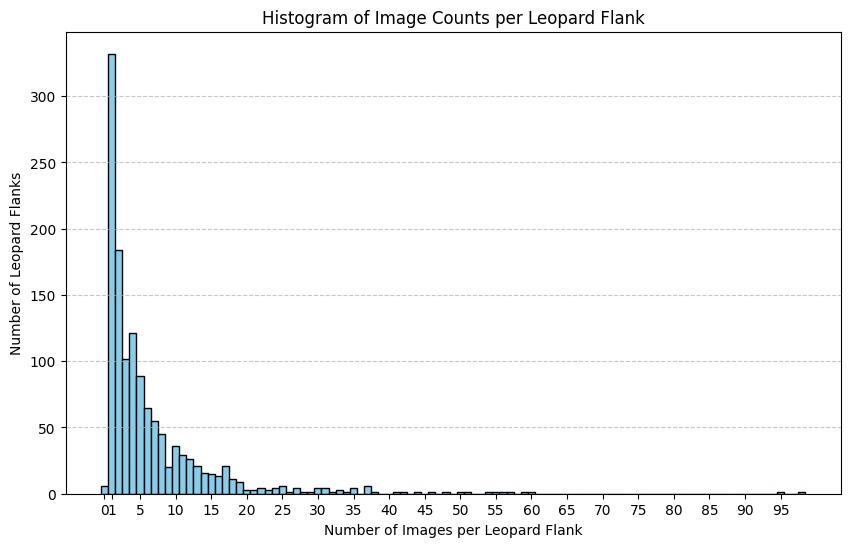

In [3]:
image_counts = []
# List all subdirectories in the destination directory
for subdir in os.listdir(dest_dir):
    subdir_path = os.path.join(dest_dir, subdir)
    if os.path.isdir(subdir_path):  # Ensure it's a directory
        # Get a list of image files in the subdirectory
        files = [file for file in os.listdir(subdir_path) if file.lower().endswith('.jpg')]
        image_counts.append(len(files))

plt.figure(figsize=(10, 6))  # Set the figure size
# Create histogram with specified bins and alignment
plt.hist(image_counts, bins=range(min(image_counts), max(image_counts) + 2), align='left', color='skyblue', edgecolor='black')
plt.title('Histogram of Image Counts per Leopard Flank')
plt.xlabel('Number of Images per Leopard Flank')
plt.ylabel('Number of Leopard Flanks')

# Generate ticks: Include 0, 1 and every multiple of 5
ticks = set(x for x in range(min(image_counts), max(image_counts) + 1) if x % 5 == 0)
ticks.update([1])  # Explicitly add 0 and 1 to ensure they are included
plt.xticks(sorted(ticks))  # Sort the ticks to maintain order on the axis

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
# Convert image_counts to a NumPy array for better performance on operations
image_counts = np.array(image_counts)

# Calculate total number of directories
total_directories = len(image_counts)

# Calculate total number of images
total_images = np.sum(image_counts)

# Calculate the mean number of images per directory
mean_images = np.mean(image_counts)

# Calculate the median number of images per directory
median_images = np.median(image_counts)

# Print the results
print(f"Total number of directories: {total_directories}")
print(f"Total number of images: {total_images}")
print(f"Mean number of images per directory: {mean_images:.2f}")
print(f"Median number of images per directory: {median_images}")


Total number of directories: 1285
Total number of images: 8279
Mean number of images per directory: 6.44
Median number of images per directory: 4.0


Average Height: 511.9950477110762
Average Width: 1083.949752385554
Average Aspect Ratio: 2.2248583738425833


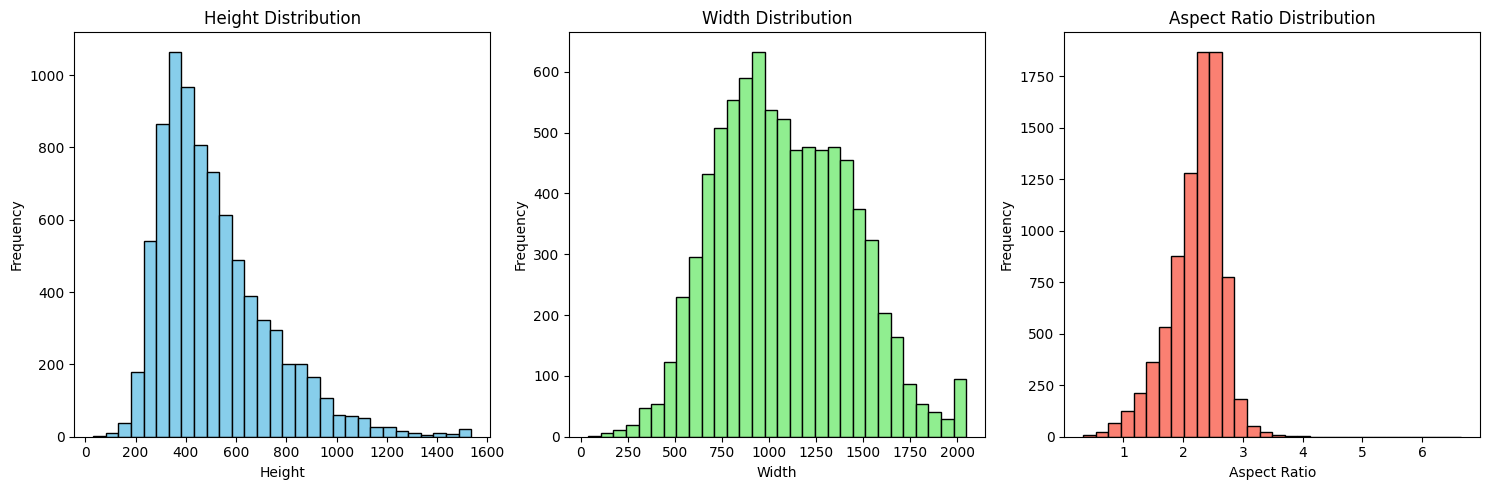

In [6]:
# Directory containing subdirectories of images
root_dir = '../data/background_removed_histogram_matching'

# Initialize lists to store image dimensions
heights = []
widths = []
aspect_ratios = []

# Traverse the directory and gather image information
for subdir, _, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg'):
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    width, height = img.size
                    heights.append(height)
                    widths.append(width)
                    aspect_ratios.append(width / height)
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")

# Convert lists to numpy arrays for easier analysis
heights = np.array(heights)
widths = np.array(widths)
aspect_ratios = np.array(aspect_ratios)

# Calculate average height, width, and aspect ratio
average_height = np.mean(heights)
average_width = np.mean(widths)
average_aspect_ratio = np.mean(aspect_ratios)

print(f"Average Height: {average_height}")
print(f"Average Width: {average_width}")
print(f"Average Aspect Ratio: {average_aspect_ratio}")

# Plot histograms for height, width, and aspect ratio
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(heights, bins=30, color='skyblue', edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(widths, bins=30, color='lightgreen', edgecolor='black')
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(aspect_ratios, bins=30, color='salmon', edgecolor='black')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Checking histogram equalization use

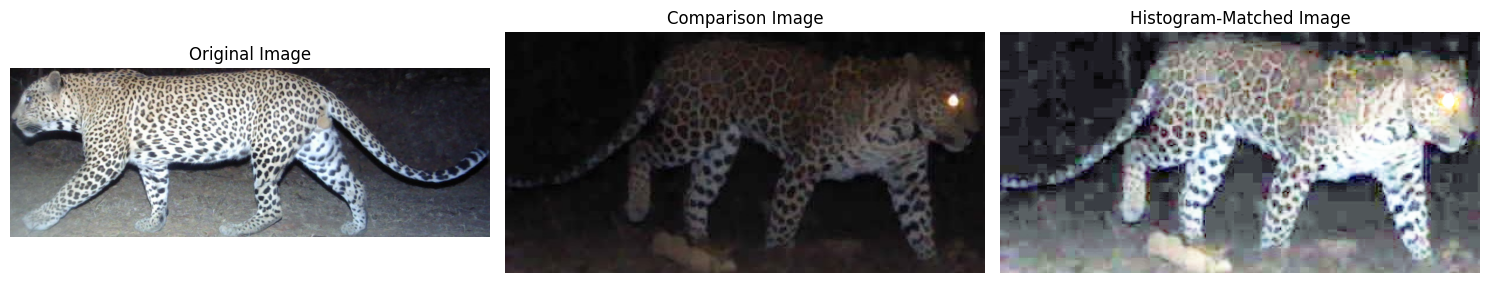

In [18]:
hist_matching_path = "../data/histogram_matching/0_0_BG-01A-2019-02-05_05-10-44.jpg"
comparison_image = "../data/minimum_train_data_cropped/BHA32_Right/0_0_109B-2013-12-09_19-47-01.jpg"

def display_histogram_matching(hist_matching_path, comparison_image):
    # Load the images using OpenCV
    img = cv2.imread(hist_matching_path)
    comparison_img = cv2.imread(comparison_image)

    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    comparison_img_rgb = cv2.cvtColor(comparison_img, cv2.COLOR_BGR2RGB)

    # Perform histogram matching
    matched_image = match_histograms(comparison_img_rgb, img_rgb, channel_axis=-1)

    # Create a figure with three subplots side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    # Display the original image
    ax1.imshow(img_rgb)
    ax1.set_title('Original Image')
    ax1.axis('off')

    # Display the comparison image
    ax2.imshow(comparison_img_rgb)
    ax2.set_title('Comparison Image')
    ax2.axis('off')

    # Display the histogram-matched image
    ax3.imshow(matched_image)
    ax3.set_title('Histogram-Matched Image')
    ax3.axis('off')

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.show()

display_histogram_matching(hist_matching_path, comparison_image)

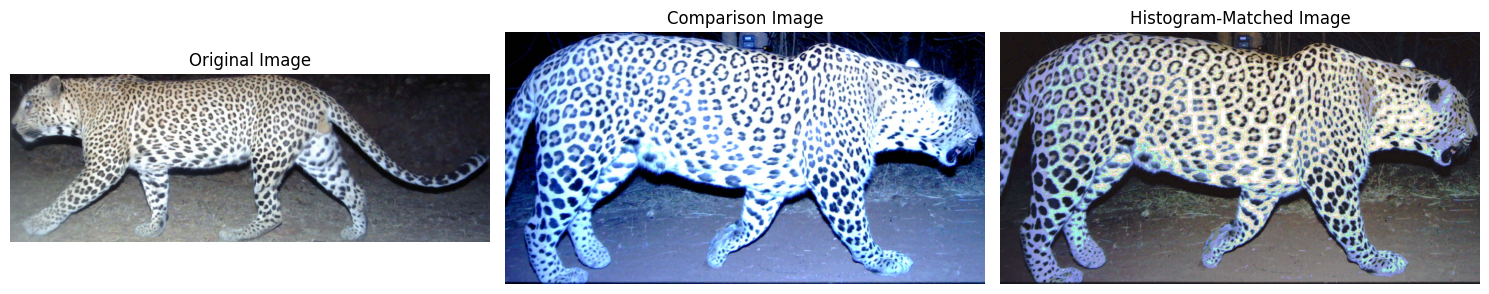

In [19]:
hist_matching_path = "../data/histogram_matching/0_0_BG-01A-2019-02-05_05-10-44.jpg"
comparison_image = "../data/minimum_train_data_cropped/BGL09_right/0_0_BG-97B-2019-03-05_22-09-31.jpg"

display_histogram_matching(hist_matching_path, comparison_image)

Image saved as output.png


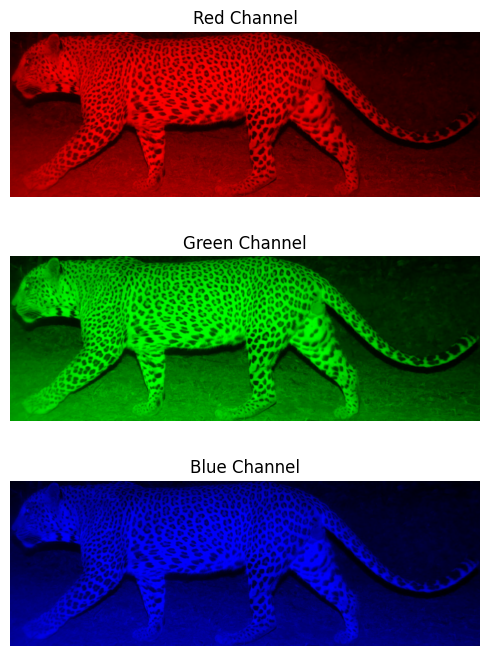

In [33]:
hist_matching_path = "../data/histogram_matching/0_0_BG-01A-2019-02-05_05-10-44.jpg"
binary_path = "../data/train_binary_output/BGL01_left/0_0_BG-01A-2019-02-05_05-10-44.jpg"

def display_channels(hist_matching_path, binary_path=None, output_path='output.png'):
    # Load the images
    img = cv2.imread(hist_matching_path)
    if binary_path is not None:
        binary_img = cv2.imread(binary_path, cv2.IMREAD_GRAYSCALE)
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 10))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 7))

    # Convert BGR to RGB (OpenCV loads images in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Create single-channel images
    red_channel = np.zeros_like(img_rgb)
    red_channel[:,:,0] = img_rgb[:,:,0]

    green_channel = np.zeros_like(img_rgb)
    green_channel[:,:,1] = img_rgb[:,:,1]

    blue_channel = np.zeros_like(img_rgb)
    blue_channel[:,:,2] = img_rgb[:,:,2]

    # Display the Red channel
    ax1.imshow(red_channel)
    ax1.set_title('Red Channel')
    ax1.axis('off')

    # Display the Green channel
    ax2.imshow(green_channel)
    ax2.set_title('Green Channel')
    ax2.axis('off')

    # Display the Blue channel
    ax3.imshow(blue_channel)
    ax3.set_title('Blue Channel')
    ax3.axis('off')

    if binary_path is not None:
        # Display the Binary image
        ax4.imshow(binary_img, cmap='gray')
        ax4.set_title('Edge Detection Channel')
        ax4.axis('off')

    # Adjust the layout
    plt.tight_layout()

    # Save the figure with high quality
    plt.savefig(output_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
    

    print(f"Image saved as {output_path}")

display_channels(hist_matching_path, binary_path=None)

Image saved as output.png


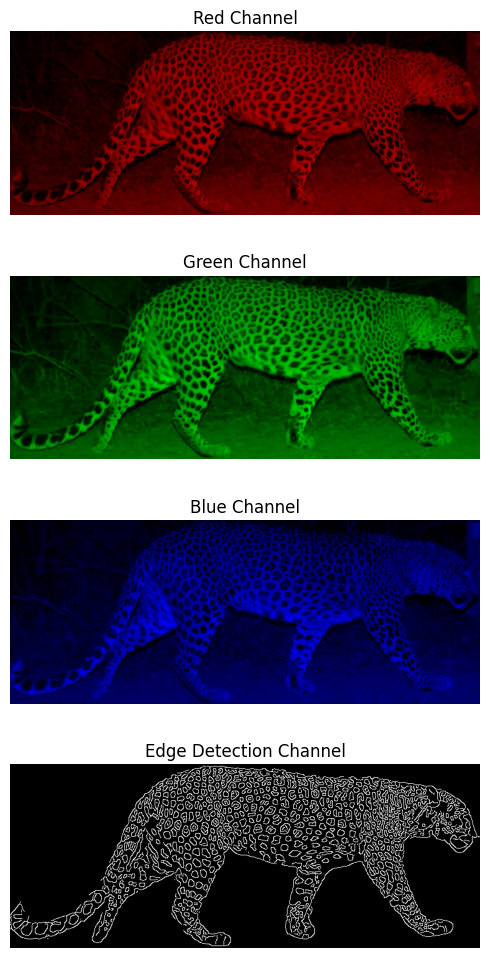

In [36]:
binary_path = "../data/train_binary_output/BGL03_right/0_0_BG-07B-2019-02-12_21-32-42.jpg"
rgb_path = "../data/train_dataset/BGL03_right/0_0_BG-07B-2019-02-12_21-32-42.jpg"

display_channels(rgb_path, binary_path)

## Analysis for Paper

In [23]:
# Calculating the Hotspotter DT5AP metric. Given Hotspotter's old interface, the matches had to be done manually and stored in a csv.
# We thus load the CSV here and calculate the DT5AP metric using the provided function.
# Load the CSV file
file_path = '../../../../../downloads/Hoja de cálculo sin título - Hoja 1 (1).csv' 
data = pd.read_csv(file_path)

# Convert the dataframe to a tensor where 1.0 is a match, 0.0 is no match, and NaN remains NaN
matches_tensor = torch.tensor(data.iloc[:, 1:].values, dtype=torch.float32)

# Function to calculate dynamic top-k average precision with NaNs treated as fewer matches
def compute_dynamic_top_k_avg_precision_v3(matches_tensor, max_k):
    num_samples = matches_tensor.size(0)
    avg_precisions = torch.zeros(num_samples)
    valid_counts = 0

    for i in range(num_samples):
        # Count the number of valid matches (i.e., non-NaN values) for the current sample
        valid_k = torch.sum(~torch.isnan(matches_tensor[i])).item()
        dynamic_k = min(int(valid_k), max_k)

        if dynamic_k > 0:
            # Retrieve the top dynamic_k elements, treating NaNs as larger than any valid match
            valid_matches = matches_tensor[i, :dynamic_k]
            valid_matches = valid_matches[~torch.isnan(valid_matches)]

            # Precision at each k position
            precision_at_k = valid_matches.cumsum(0) / torch.arange(1, dynamic_k + 1).float()
            avg_precisions[i] = precision_at_k.mean()
            valid_counts += 1
    # Compute the mean of valid average precisions
    if valid_counts > 0:
        print(valid_counts)
        mean_avg_precision = avg_precisions.sum() / valid_counts
    else:
        mean_avg_precision = torch.tensor(0.0)  # In case all rows have dynamic k = 0

    # Sort avg_precisions and return
    return mean_avg_precision, avg_precisions.sort()[0]

# Parameters
max_k = 5

# Calculate and sort average precisions
mean_avg_precision, sorted_avg_precisions = compute_dynamic_top_k_avg_precision_v3(matches_tensor, max_k)

# Print the sorted average precisions
print(mean_avg_precision)
print(sorted_avg_precisions)


300
tensor(0.9424)
tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4567, 0.4567, 0.4567,
        0.5208, 0.5208, 0.5433, 0.6111, 0.6111, 0.7133, 0.7133, 0.7133, 0.7500,
        0.7500, 0.7917, 0.8033, 0.8433, 0.8433, 0.8433, 0.8542, 0.8889, 0.8889,
        0.8889, 0.8889, 0.8889, 0.8889, 0.9600, 0.9600, 0.9600, 0.9600, 0.9600,
        0.9600, 0.9600, 0.9600, 0.9600, 0.9600, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.000

Plot saved as Precision_Test_plot_high_res.png


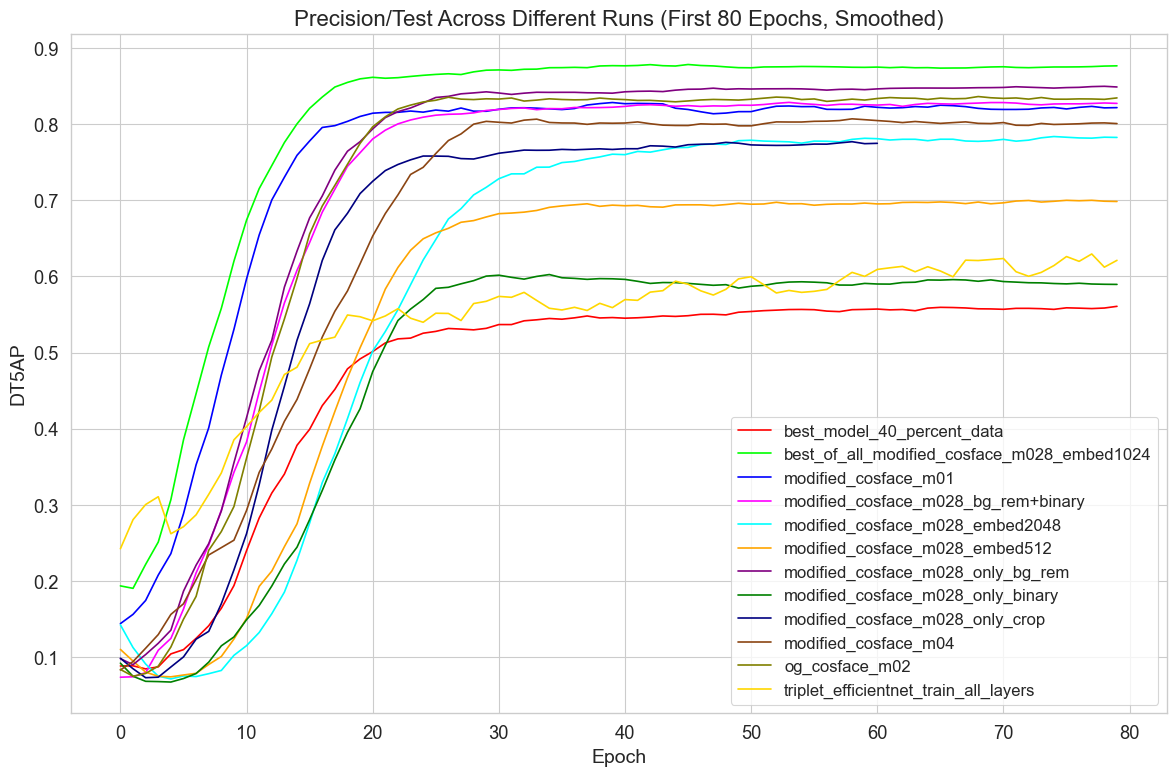

In [50]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

def list_all_tags(log_dir):
    tags_by_run = {}
    for run in os.listdir(log_dir):
        run_path = os.path.join(log_dir, run)
        if os.path.isdir(run_path):
            event_acc = EventAccumulator(run_path)
            event_acc.Reload()
            tags_by_run[run] = event_acc.Tags()['scalars']
    return tags_by_run

def smooth_data(data, weight=0.6):
    last = data[0]
    smoothed = []
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

def read_tensorboard_data(log_dir, tag, max_epochs=80):
    data = {}
    for run in os.listdir(log_dir):
        run_path = os.path.join(log_dir, run)
        if os.path.isdir(run_path):
            event_acc = EventAccumulator(run_path)
            event_acc.Reload()
            if tag in event_acc.Tags()['scalars']:
                events = event_acc.Scalars(tag)
                data[run] = [(event.step, event.value) for event in events[:max_epochs]]
    return data

def create_distinct_colormap(n_colors):
    base_colors = [
        '#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#00FFFF', 
        '#FFA500', '#800080', '#008000', '#000080', '#8B4513', '#808000',
        '#FFD700'
    ]
    # Ensure we have enough colors
    while len(base_colors) < n_colors:
        base_colors += base_colors
    return base_colors[:n_colors]

log_dir = '../runs_to_print_2'
tag = 'Precision/Test'
data = read_tensorboard_data(log_dir, tag)

if not data:
    print(f"No data found for tag: {tag}")
else:
    plt.figure(figsize=(12, 8))
    
    # Sort the data items alphabetically by run names
    sorted_data = sorted(data.items())
    
    # Create a custom colormap
    distinct_colors = create_distinct_colormap(len(sorted_data))
    
    for (run, values), color in zip(sorted_data, distinct_colors):
        if values:  # Only plot if there's data
            steps, metrics = zip(*values)
            smoothed_metrics = smooth_data(metrics)
            plt.plot(steps, smoothed_metrics, label=run, color=color)

    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('DT5AP', fontsize=14)
    plt.title(f'{tag} Across Different Runs (First 80 Epochs, Smoothed)', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    output_filename = f"{tag.replace('/', '_')}_plot_high_res.png"
    plt.savefig(output_filename, dpi=90, bbox_inches='tight')
    print(f"Plot saved as {output_filename}")

    # Display the plot
    plt.show()

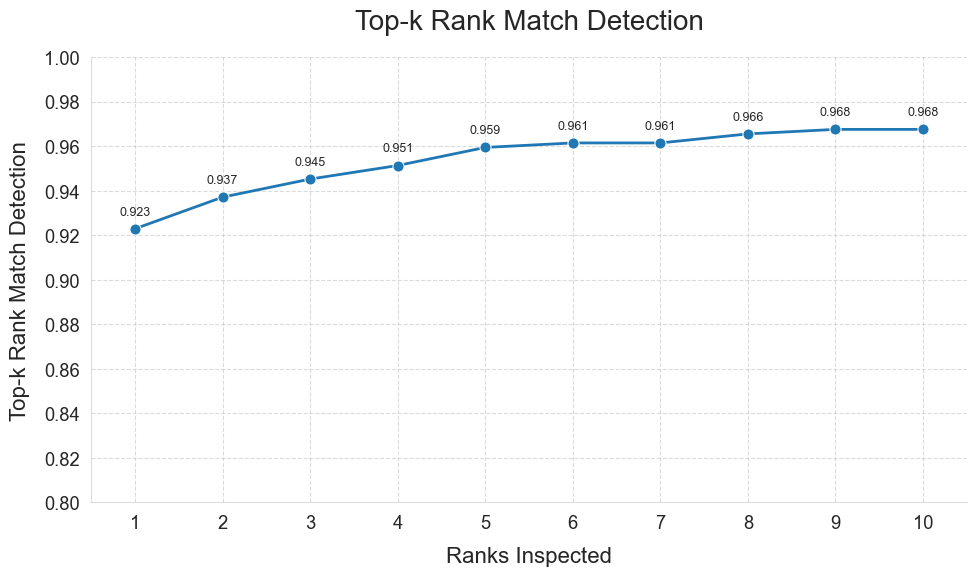

In [43]:
import pandas as pd
import seaborn as sns

# Set up the plot style
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Read the CSV file
df = pd.read_csv('../../../../../downloads/best_of_all_modified_cosface_m028_embed1024.csv')

# Filter data up to 9 in the CSV (which corresponds to 10 ranks inspected)
df_filtered = df[df['Step'] <= 9]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=df_filtered['Step'] + 1, y=df_filtered['Value'], marker='o', color='#1f77b4', linewidth=2, markersize=8)

# Customize the plot
ax.set_title('Top-k Rank Match Detection', fontsize=20, pad=20)
ax.set_xlabel('Ranks Inspected', fontsize=16, labelpad=10)
ax.set_ylabel('Top-k Rank Match Detection', fontsize=16, labelpad=10)

# Set axis limits
ax.set_ylim(0.8, 1.0)
ax.set_xlim(0.5, 10.5)

# Add more ticks on y-axis
ax.set_yticks([i/100 for i in range(80, 101, 2)])
ax.set_yticklabels([f'{i/100:.2f}' for i in range(80, 101, 2)])

# Set x-axis ticks
ax.set_xticks(range(1, 11))

# Adjust spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add a light grid
ax.grid(True, linestyle='--', alpha=0.7, color='#cccccc')

# Annotate data points
for x, y in zip(df_filtered['Step'] + 1, df_filtered['Value']):
    ax.annotate(f'{y:.3f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Save the plot with high DPI
plt.savefig('rank_match_detection_plot.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()